#  UK domestic flights analyse with Python & NetworkX
### Source of data
http://www.bifi.es/~cardillo/data.html
### Data description
A temporal network of domestic flights operated in the United Kingdom between 1990 and 2003. Each of the 14 years is encoded as a separate network. Nodes are UK airports, and an edge represents a direct flight from one to another. Edges are weighted by the total number of passengers transported over the year. Nodes include spatial coordinates and the name of the nearby city.

The network is weighted and undirected.

More details about this dataset can be found in the paper: 

https://arxiv.org/abs/1807.00565

The data have been found in the website of the United Kingdom Civil Aviation Authority (CAA), available at the following URL:

https://www.caa.co.uk/Airline_data_historic/

## Download and load data

In [1]:
import requests
url = "http://www.bifi.es/~cardillo/datasets/uk-air-time_varying.zip"
content = requests.get(url)

from io import BytesIO
from zipfile import ZipFile
from urllib.request import urlopen
f = ZipFile(BytesIO(content.content))

import pandas as pd 
fileName = "Table_1_12_Domestic_Passengers_Uplifted_Between_UK_Airports_2003_adjlist.csv"
data = pd.read_csv(f.open(fileName), sep = ';', usecols= [0,1,2]) 

data.head()

,#this_apt_name,that_apt_name,passengers
0,HEATHROW,ABERDEEN,483226
1,HEATHROW,BELFAST CITY,743758
2,HEATHROW,BELFAST INTERNATIONAL,25963
3,HEATHROW,EDINBURGH,1577063
4,HEATHROW,GLASGOW,1345532


## Create graph

In [2]:
import networkx as nx

g=nx.from_pandas_edgelist(data,
                          source='#this_apt_name',
                          target='that_apt_name',
                          edge_attr='passengers',
                          create_using=nx.Graph())

## Analyzing gaphs

Some stats

In [3]:
print(f'Number of nodes in graph: {g.number_of_nodes()}')
print(f'Number of edges in graph: {g.number_of_edges()}')
print(f'Graph density: {nx.density(g)}')
print(f'Graph diameter: {nx.diameter(g)}')
print(f'Graph order: {g.order()}')
print(f'Graph size: {g.size()}')

Number of nodes in graph: 46
Number of edges in graph: 238
Graph density: 0.22995169082125605
Graph diameter: 4
Graph order: 46
Graph size: 238


The weighted node degree (sum of edge weights for edges incident to that node). In this case - all passengers per node.

In [4]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

degree = dict(g.degree(weight='passengers'))
sorted_degree = {r: degree[r] for r in sorted(degree, key=degree.get)}

plt.figure(figsize=(5, 10))
plt.barh(list(sorted_degree.keys()), sorted_degree.values())
plt.show()

<Figure size 500x1000 with 1 Axes>

Compute the degree centrality for nodes.

The degree centrality for a node v is the fraction of nodes it is connected to.



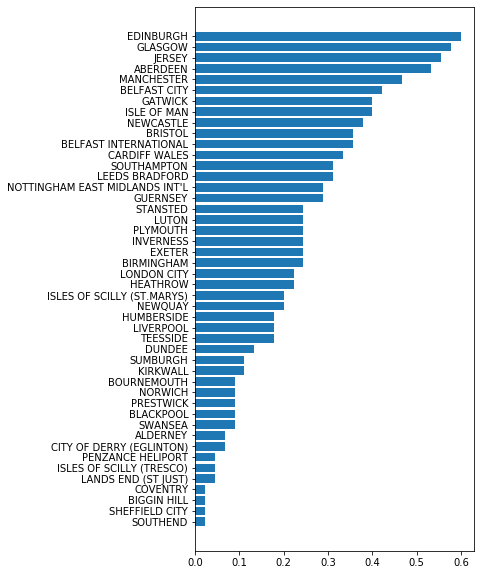

In [5]:
degree_centrality = dict(nx.degree_centrality(g))
sorted_degree_centrality = {r: degree_centrality[r] for r in sorted(degree_centrality, key=degree_centrality.get)}

plt.figure(figsize=(5, 10))
plt.barh(list(sorted_degree_centrality.keys()), sorted_degree_centrality.values())
plt.show()

Compute the shortest-path betweenness centrality for nodes.

Node with higher betweenness centrality would have more control over the network, because more information will pass through that node.

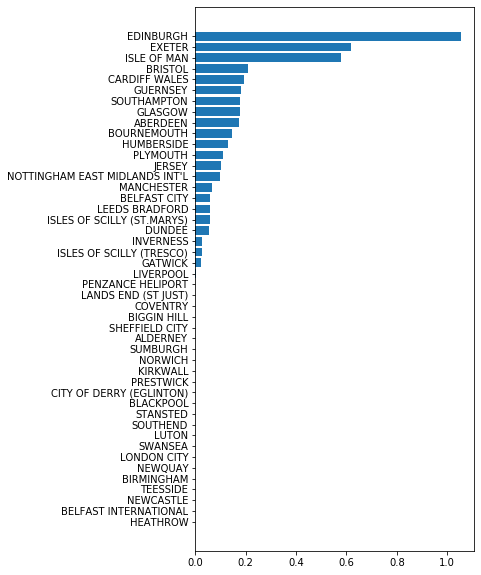

In [6]:
betweenness_centrality = dict(nx.betweenness_centrality(g, weight='passengers'))
sorted_betweenness_centrality = {r: betweenness_centrality[r] for r in sorted(betweenness_centrality, key=betweenness_centrality.get)}

plt.figure(figsize=(5, 10))
plt.barh(list(sorted_betweenness_centrality.keys()), sorted_betweenness_centrality.values())
plt.show()

Compute the clustering coefficient for every node.

Clustering coefficient is a measure of the degree to which nodes in a graph tend to cluster together.

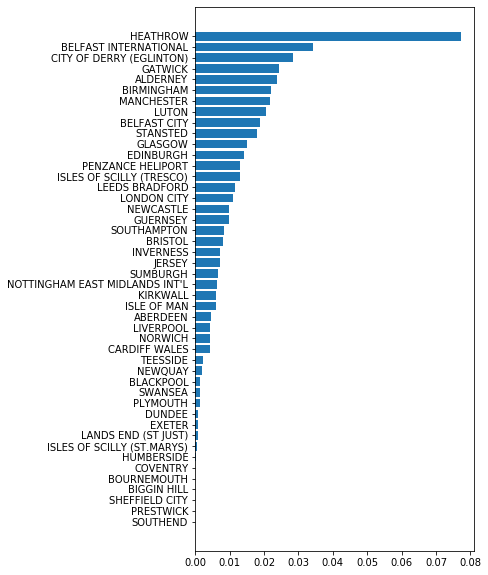

In [7]:
clustering_coefficient = nx.clustering(g, weight='passengers')
sorted_clustering_coefficient = {r: clustering_coefficient[r] for r in sorted(clustering_coefficient, key=clustering_coefficient.get)}

plt.figure(figsize=(5, 10))
plt.barh(list(sorted_clustering_coefficient.keys()), sorted_clustering_coefficient.values())
plt.show()

Compute closeness centrality for nodes.

Closeness centrality is a way of detecting nodes that are able to spread information very efficiently through a graph. The closeness centrality of a node measures its average farness (inverse distance) to all other nodes. Nodes with a high closeness score have the shortest distances to all other nodes.

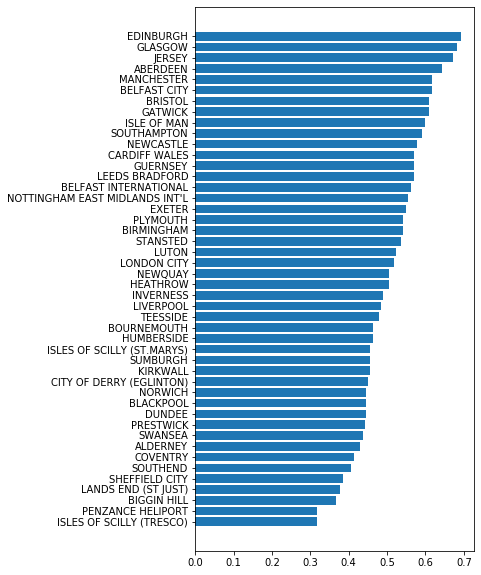

In [8]:
closeness_centrality = dict(nx.closeness_centrality(g))
sorted_closeness_centrality = {r: closeness_centrality[r] for r in sorted(closeness_centrality, key=closeness_centrality.get)}

plt.figure(figsize=(5, 10))
plt.barh(list(sorted_closeness_centrality.keys()), sorted_closeness_centrality.values())
plt.show()

PageRank computes a ranking of the nodes in the graph G based on the structure of the incoming links. It was originally designed as an algorithm to rank web pages.

The PageRank algorithm was designed for directed graphs but this algorithm does not check if the input graph is directed and will execute on undirected graphs by converting each edge in the directed graph to two edges.

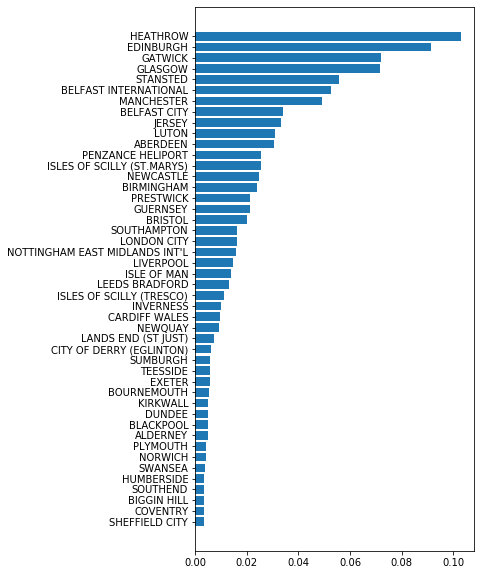

In [9]:
pagerank = dict(nx.pagerank(g, weight='passengers'))
sorted_pagerank = {r: pagerank[r] for r in sorted(pagerank, key=pagerank.get)}

plt.figure(figsize=(5, 10))
plt.barh(list(sorted_pagerank.keys()), sorted_pagerank.values())
plt.show()

Full graph

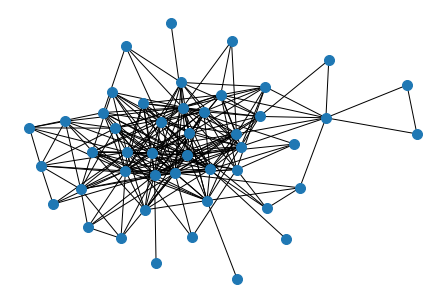

In [10]:
nx.draw_kamada_kawai(g, node_size=100, weight='passengers')

The most important nodes graph (above average node passengers)

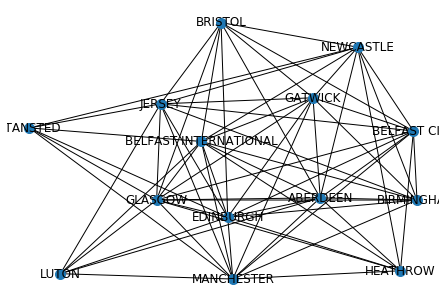

In [11]:
degrees = dict(g.degree(weight='passengers')).values()
avg = sum(degrees) / len(degrees)

selected_nodes = {k: v for k, v in dict(g.degree(weight='passengers')).items() if v > avg}
subgraph = g.subgraph(selected_nodes)
nx.draw_kamada_kawai(subgraph, node_size=100, with_labels=True, label_color='r', weight='passengers')

Edges per node - possible connection to other airports.

In [12]:
# Undirected graph does not have successors and predecessors

airports = dict(g.degree(weight='passengers')).keys()
airports_ordered = sorted(airports)

datas = []

for key in airports_ordered:
    data = {}
    data['Name'] = key
    data['Edges count'] = len(g.edges(key))
    edges = [tuple[1] for tuple in list(g.edges(key))]
    data['Edges list'] = '\n'.join(sorted(edges))
    datas.append(data)
    
sorted_datas = sorted(datas, key=lambda x:x['Edges count'], reverse=True)
    
import tabulate

print("First 10 rows (only for present result)")
header = ['Name', 'Edges count','Edges list']
rows =  [x.values() for x in sorted_datas[:10]]
print(tabulate.tabulate(rows, header, "fancy_grid")) 
print('...')

First 10 rows (only for present result)
╒═══════════════════════╤═══════════════╤════════════════════════════════╕
│ Name                  │   Edges count │ Edges list                     │
╞═══════════════════════╪═══════════════╪════════════════════════════════╡
│ EDINBURGH             │            27 │ ABERDEEN                       │
│                       │               │ BELFAST CITY                   │
│                       │               │ BELFAST INTERNATIONAL          │
│                       │               │ BIRMINGHAM                     │
│                       │               │ BRISTOL                        │
│                       │               │ CARDIFF WALES                  │
│                       │               │ COVENTRY                       │
│                       │               │ EXETER                         │
│                       │               │ GATWICK                        │
│                       │               │ GLASGOW           

Possible connections for each with each taking into account the minimum number of changes.

In [13]:
datas = []

for key1 in list(airports_ordered):
  for key2 in list(airports_ordered):
    if (key1 == key2):
      continue
    
    data = {}
    data['From'] = key1
    data['To'] = key2
    
    path = []
    try:
      path = nx.shortest_path(g, key1, key2)
    except:
      data['Changes'] = '-'
      data['Path'] = '-'
      datas.append(data)
      continue
        
    changes = len(path) - 2
    if (changes == 0):
      data['Changes'] = 'direct'
    else:
      data['Changes'] = changes
    
    data['Path'] = ' ->\n'.join(path)
    datas.append(data)

print("First 10 rows (only for present result)")
header = ['From', 'To', 'Changes', 'Path']
rows =  [x.values() for x in datas[:10]]
print(tabulate.tabulate(rows, header, "fancy_grid"))
print('...')

First 10 rows (only for present result)
╒══════════╤══════════════════════════╤═══════════╤══════════════════════════╕
│ From     │ To                       │ Changes   │ Path                     │
╞══════════╪══════════════════════════╪═══════════╪══════════════════════════╡
│ ABERDEEN │ ALDERNEY                 │ 1         │ ABERDEEN ->              │
│          │                          │           │ SOUTHAMPTON ->           │
│          │                          │           │ ALDERNEY                 │
├──────────┼──────────────────────────┼───────────┼──────────────────────────┤
│ ABERDEEN │ BELFAST CITY             │ direct    │ ABERDEEN ->              │
│          │                          │           │ BELFAST CITY             │
├──────────┼──────────────────────────┼───────────┼──────────────────────────┤
│ ABERDEEN │ BELFAST INTERNATIONAL    │ direct    │ ABERDEEN ->              │
│          │                          │           │ BELFAST INTERNATIONAL    │
├──────────┼

## Changes statistics

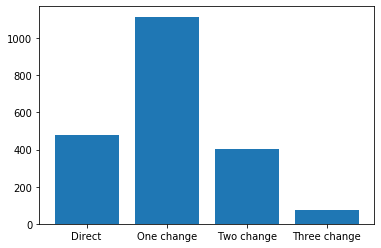

In [14]:
directCount = sum(1 for connection in datas if connection['Changes'] == 'direct')
oneChangeCount = sum(1 for connection in datas if connection['Changes'] == 1)
twoChangesCount = sum(1 for connection in datas if connection['Changes'] == 2)
threeChangesCount = sum(1 for connection in datas if connection['Changes'] == 3)

headers = ['Direct', 'One change', 'Two change', 'Three change']
values = [directCount, oneChangeCount, twoChangesCount, threeChangesCount]
plt.bar(headers, values)
plt.show()

## Business question: which airport has good connections but doesn't have many passengers? Potential for extension of airport to increase passenger numbers.

1. I find the median value of the number of connections among all airports to reject those insignificant
2. I filter airports with a number of connections above the average value calculated earlier
3. I calculate the average number of passengers per connection
4. I present the results sorting them in increasing average order of passengers per connection

In [15]:
airportsEdgesCount = []
for key in airports:
    airportsEdgesCount.append(len(g.edges(key)))
 
import numpy as np
edgeMiddleValue = np.median(airportsEdgesCount)

airportsWithEdgeAboveMiddleValue = []
for key in airports:
    if len(g.edges(key)) > edgeMiddleValue :
        airportsWithEdgeAboveMiddleValue.append(key)

datas = []
for key in airportsWithEdgeAboveMiddleValue:
    data = {}
    data['Name'] = key
    data['Edges count'] = len(g.edges(key))
    data['Passengers count'] = degree[key]
    data['Passengers per edge'] = data['Passengers count'] / data['Edges count']
    datas.append(data)
    
sorted_datas = sorted(datas, key=lambda x:x['Passengers per edge'], reverse=False)

header = ['Name', 'Edges count', 'Passengers count', 'Passengers per edge']
rows =  [x.values() for x in sorted_datas]
print(tabulate.tabulate(rows, header, "fancy_grid"))

╒════════════════════════════════╤═══════════════╤════════════════════╤═══════════════════════╕
│ Name                           │   Edges count │   Passengers count │   Passengers per edge │
╞════════════════════════════════╪═══════════════╪════════════════════╪═══════════════════════╡
│ PLYMOUTH                       │            11 │              49901 │               4536.45 │
├────────────────────────────────┼───────────────┼────────────────────┼───────────────────────┤
│ EXETER                         │            11 │              74742 │               6794.73 │
├────────────────────────────────┼───────────────┼────────────────────┼───────────────────────┤
│ CARDIFF WALES                  │            15 │             346676 │              23111.7  │
├────────────────────────────────┼───────────────┼────────────────────┼───────────────────────┤
│ LEEDS BRADFORD                 │            14 │             441573 │              31540.9  │
├────────────────────────────────┼──────

## Business question: which major airports have the most changes between? Potentially cost-effective introduction of direct connections.

1. I find the median number of passengers among all airports.
2. I filter airports that have a number of passengers above the calculated median
3. I find the maximum number of transfers between airports obtained
4. I display airports between which the number of transfers is the value found earlier

In [16]:
airportsPassengersCount = []
for key in airports:
    airportsPassengersCount.append(degree[key])
    
passengersCountMiddleValue = np.median(airportsPassengersCount)

airportsWithPassengersCountAboveMiddleValue = []
for key in airports:
    if degree[key] > passengersCountMiddleValue :
        airportsWithPassengersCountAboveMiddleValue.append(key)
        
datas = []

for key1 in list(airportsWithPassengersCountAboveMiddleValue):
  for key2 in list(airportsWithPassengersCountAboveMiddleValue):
    if (key1 == key2):
      continue
    data = {}
    data['From'] = key1
    data['To'] = key2
    path = []
    try:
      path = nx.shortest_path(g, key1, key2)
    except:
      data['Changes'] = 0
      data['Passengers'] = 0
      datas.append(data)
      continue
    changes = len(path) - 2
    data['Changes'] = changes
    try:
      passengers = g.get_edge_data(key1, key2)['passengers']
    except:
      data['Passengers'] = '-'
      datas.append(data)
      continue
    data['Passengers'] = passengers
    datas.append(data)

maxChanges = max(d['Changes'] for d in datas)

maxChangesBigAirports = []
for data in datas:
    if data['Changes'] == maxChanges :
        maxChangesBigAirports.append(data)
        
header = ['From', 'To', 'Changes', 'Passengers']
rows =  [x.values() for x in maxChangesBigAirports]
print(tabulate.tabulate(rows, header, "fancy_grid"))

╒═══════════╤═══════════╤═══════════╤══════════════╕
│ From      │ To        │   Changes │ Passengers   │
╞═══════════╪═══════════╪═══════════╪══════════════╡
│ INVERNESS │ PRESTWICK │         2 │ -            │
├───────────┼───────────┼───────────┼──────────────┤
│ PRESTWICK │ INVERNESS │         2 │ -            │
╘═══════════╧═══════════╧═══════════╧══════════════╛


## Business question: Which direct connections between major airports have the fewest passengers? Potentially required reduction in ticket prices for these connections

1. I find all direct connections among the previously found large airports
2. I display sorted connections by the number of passengers

In [17]:
directConnections = []
for data in datas:
    if data['Changes'] == 0 :
        directConnections.append(data)
       
sorted_directConnections = sorted(directConnections, key=lambda x:x['Passengers'], reverse=False)

header = ['From', 'To', 'Changes', 'Passengers']
rows =  [x.values() for x in sorted_directConnections[:50]]
print(tabulate.tabulate(rows, header, "fancy_grid"))

╒════════════════════════════════╤════════════════════════════════╤═══════════╤══════════════╕
│ From                           │ To                             │   Changes │   Passengers │
╞════════════════════════════════╪════════════════════════════════╪═══════════╪══════════════╡
│ HEATHROW                       │ ISLE OF MAN                    │         0 │            0 │
├────────────────────────────────┼────────────────────────────────┼───────────┼──────────────┤
│ ABERDEEN                       │ LONDON CITY                    │         0 │            0 │
├────────────────────────────────┼────────────────────────────────┼───────────┼──────────────┤
│ BELFAST CITY                   │ NOTTINGHAM EAST MIDLANDS INT'L │         0 │            0 │
├────────────────────────────────┼────────────────────────────────┼───────────┼──────────────┤
│ EDINBURGH                      │ GUERNSEY                       │         0 │            0 │
├────────────────────────────────┼────────────────